# ------------------------------------------------------

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 

In [6]:
module = pd.read_excel('log_prod.xlsx')

In [7]:
#worker = pd.read_excel('sendmsg_retry.xlsx')

In [8]:
print(module['시각'])

0      2021-10-25 15:01:37
1      2021-10-25 15:03:23
2      2021-10-25 15:04:05
3      2021-10-25 15:04:05
4      2021-10-25 15:04:05
               ...        
6689   2021-10-25 15:05:59
6690   2021-10-25 15:05:59
6691   2021-10-25 15:05:59
6692   2021-10-25 15:05:59
6693   2021-10-25 15:05:59
Name: 시각, Length: 6694, dtype: datetime64[ns]


In [9]:
#print(worker['시각'])

# 가보로 남겨야지 - 100ms단위로 타임라인 스탬프 만들기

In [10]:
import datetime

In [12]:
start = datetime.datetime(2021, 10, 25, 15, 4, 5)
end = datetime.datetime(2021, 10, 25, 15, 5, 59)
temp = start
timeline = []
while temp < end:
    print(temp)
    timeline.append(temp)
    temp = temp + datetime.timedelta(milliseconds=100)

2021-10-25 15:04:05
2021-10-25 15:04:05.100000
2021-10-25 15:04:05.200000
2021-10-25 15:04:05.300000
2021-10-25 15:04:05.400000
2021-10-25 15:04:05.500000
2021-10-25 15:04:05.600000
2021-10-25 15:04:05.700000
2021-10-25 15:04:05.800000
2021-10-25 15:04:05.900000
2021-10-25 15:04:06
2021-10-25 15:04:06.100000
2021-10-25 15:04:06.200000
2021-10-25 15:04:06.300000
2021-10-25 15:04:06.400000
2021-10-25 15:04:06.500000
2021-10-25 15:04:06.600000
2021-10-25 15:04:06.700000
2021-10-25 15:04:06.800000
2021-10-25 15:04:06.900000
2021-10-25 15:04:07
2021-10-25 15:04:07.100000
2021-10-25 15:04:07.200000
2021-10-25 15:04:07.300000
2021-10-25 15:04:07.400000
2021-10-25 15:04:07.500000
2021-10-25 15:04:07.600000
2021-10-25 15:04:07.700000
2021-10-25 15:04:07.800000
2021-10-25 15:04:07.900000
2021-10-25 15:04:08
2021-10-25 15:04:08.100000
2021-10-25 15:04:08.200000
2021-10-25 15:04:08.300000
2021-10-25 15:04:08.400000
2021-10-25 15:04:08.500000
2021-10-25 15:04:08.600000
2021-10-25 15:04:08.700000
20

In [13]:
print(len(timeline))

1140


## worker - 100ms별 count

In [9]:
worker_timeline = worker['시각']
print(len(worker_timeline))

20000


In [10]:
worker_timeline_100ms = []
for i in worker_timeline:
    strtemp = str(i)
    worker_timeline_100ms.append(strtemp[0:21])

In [11]:
count = 0
pointer = ''
x_worker = []
y_worker_count = []
for i in worker_timeline_100ms:
    if i != pointer:
        pointer = i
        x_worker.append(pointer)
        y_worker_count.append(count)
        count = 0
        count += 1
    else:
        count += 1

In [12]:
print(len(x_worker))

1146


In [13]:
print(len(y_worker_count))

1146


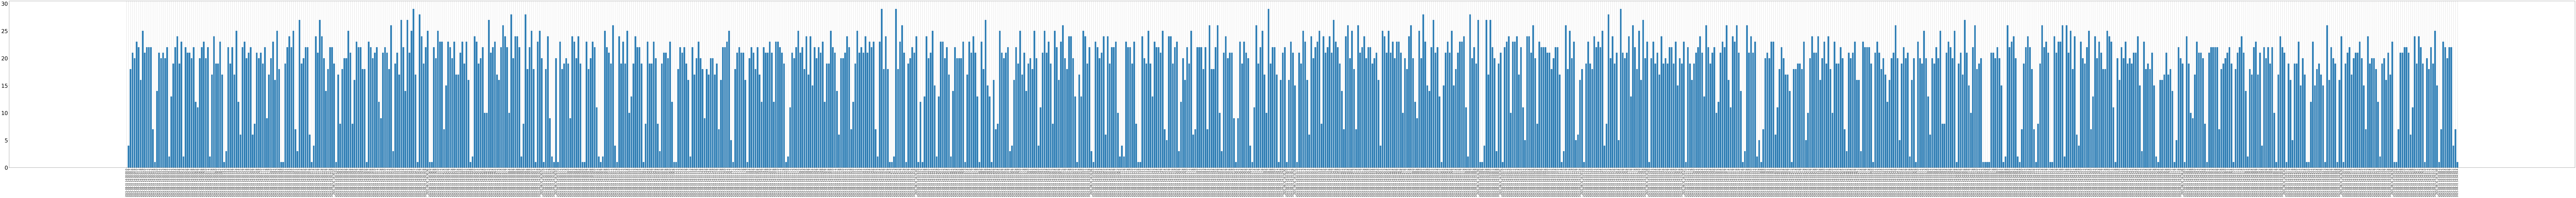

In [14]:
fig = plt.gcf()
fig.set_size_inches(300, 20)

plt.grid(True, axis='x')
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=35)
plt.bar(x_worker, y_worker_count)
plt.savefig('worker3_bar.png', dpi=100)

In [15]:
is_30sec = 0
count = 0
pointer = ''
x_worker_30sec = []
y_worker_count_30sec = []
for i in worker_timeline_100ms:
    if(is_30sec == 1934):
        break
    else:
        if i != pointer:
            pointer = i
            x_worker_30sec.append(str(pointer))
            y_worker_count_30sec.append(count)
            count = 0
            count += 1
            is_30sec += 1
        else:
            count += 1
            is_30sec += 1

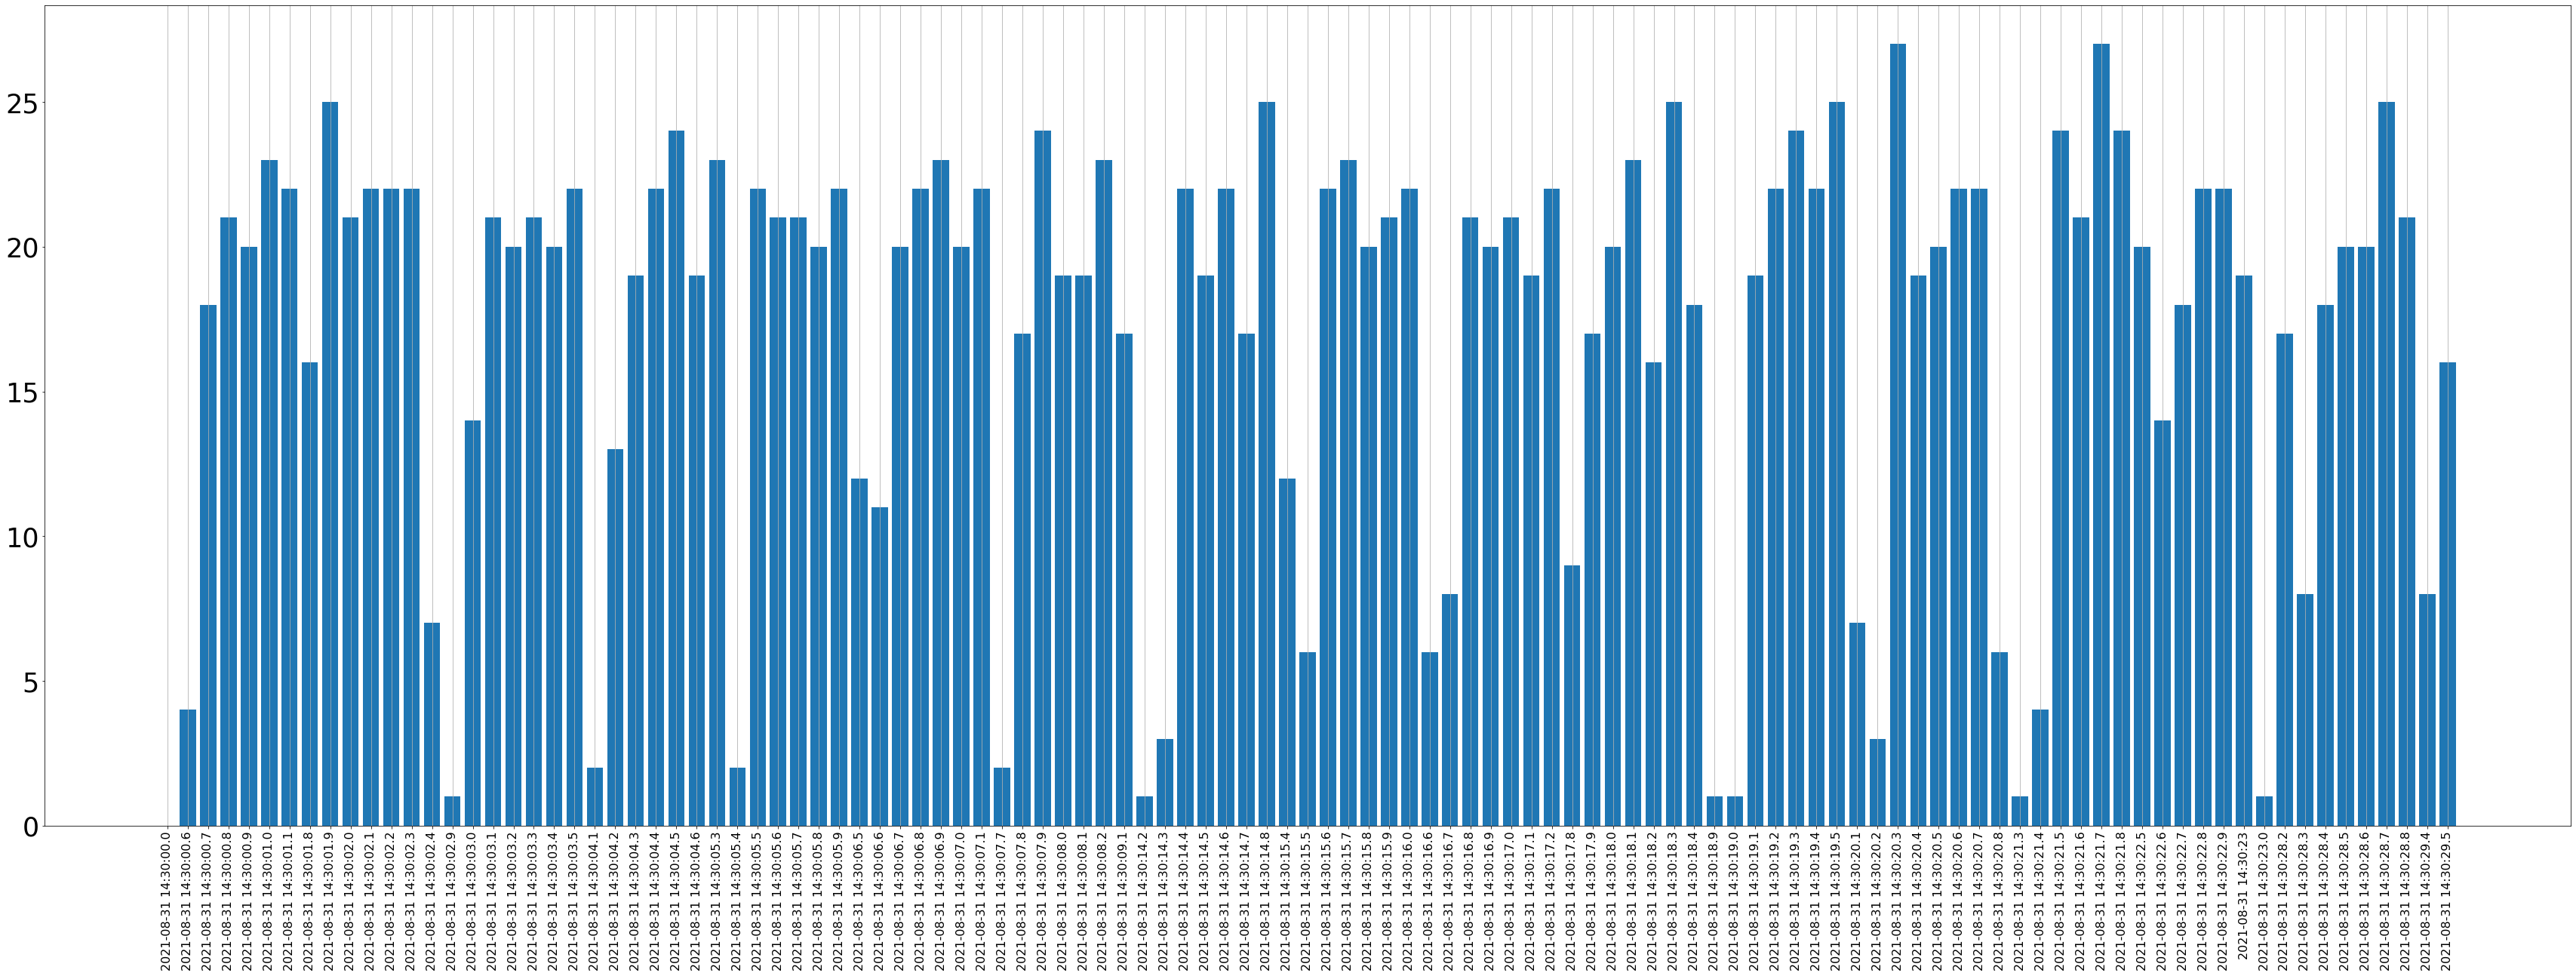

In [16]:
fig = plt.gcf()
fig.set_size_inches(60, 20)

plt.grid(True, axis='x')
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=35)
plt.bar(x_worker_30sec, y_worker_count_30sec)
plt.savefig('worker30_bar.png', dpi=100)

# 모듈 - seconds 별 count

In [14]:
module_timeline = module['시각']

In [15]:
print(module_timeline)

0      2021-10-25 15:01:37
1      2021-10-25 15:03:23
2      2021-10-25 15:04:05
3      2021-10-25 15:04:05
4      2021-10-25 15:04:05
               ...        
6689   2021-10-25 15:05:59
6690   2021-10-25 15:05:59
6691   2021-10-25 15:05:59
6692   2021-10-25 15:05:59
6693   2021-10-25 15:05:59
Name: 시각, Length: 6694, dtype: datetime64[ns]


In [16]:
print(module_timeline[0])
print(timeline[0])
print(module_timeline[0] == timeline[0])

2021-10-25 15:01:37
2021-10-25 15:04:05
False


In [17]:
count = 0
pointer = ''
x_module = []
y_module_count = []
for i in module_timeline:
    if i != pointer:
        pointer = i
        x_module.append(str(pointer))
        y_module_count.append(count)
        count = 0
        count += 1
    else:
        count += 1

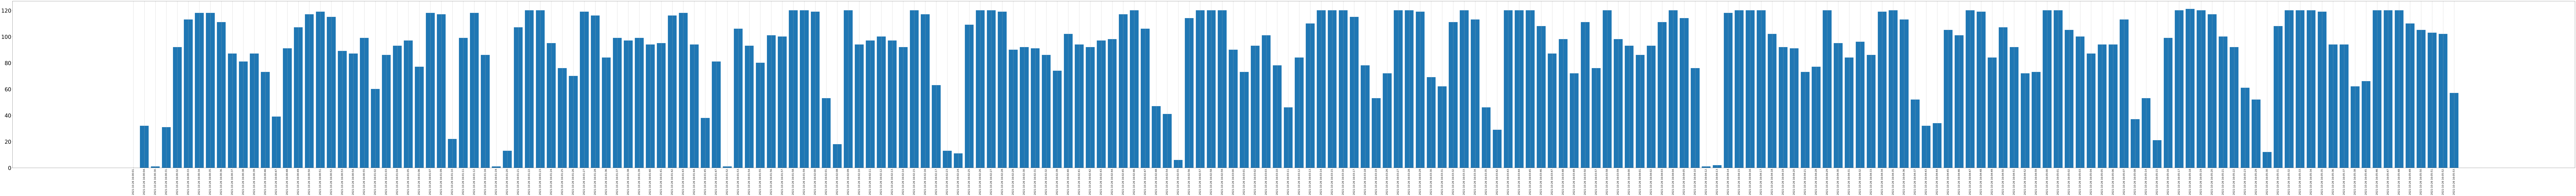

In [40]:
fig2 = plt.gcf()
fig2.set_size_inches(300, 20)

plt.grid(True, axis='x')
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=35)
plt.bar(x_module, y_module_count)
plt.savefig('module_bar1028.png', dpi=100)

# x축을 맞춰보자

In [18]:
print(x_module)

['2021-10-25 15:01:37', '2021-10-25 15:03:23', '2021-10-25 15:04:05', '2021-10-25 15:04:06', '2021-10-25 15:04:07', '2021-10-25 15:04:08', '2021-10-25 15:04:09', '2021-10-25 15:04:11', '2021-10-25 15:04:21', '2021-10-25 15:04:22', '2021-10-25 15:04:23', '2021-10-25 15:04:24', '2021-10-25 15:04:25', '2021-10-25 15:04:26', '2021-10-25 15:04:27', '2021-10-25 15:04:28', '2021-10-25 15:04:29', '2021-10-25 15:04:30', '2021-10-25 15:04:31', '2021-10-25 15:04:32', '2021-10-25 15:04:33', '2021-10-25 15:04:34', '2021-10-25 15:04:35', '2021-10-25 15:04:36', '2021-10-25 15:04:37', '2021-10-25 15:04:38', '2021-10-25 15:04:39', '2021-10-25 15:04:40', '2021-10-25 15:04:41', '2021-10-25 15:04:42', '2021-10-25 15:04:43', '2021-10-25 15:04:44', '2021-10-25 15:04:45', '2021-10-25 15:04:46', '2021-10-25 15:04:47', '2021-10-25 15:04:48', '2021-10-25 15:04:49', '2021-10-25 15:04:50', '2021-10-25 15:04:51', '2021-10-25 15:04:52', '2021-10-25 15:04:53', '2021-10-25 15:04:54', '2021-10-25 15:04:55', '2021-10-2

In [23]:
print(x_worker)

['2021-08-31 14:30:00.0', '2021-08-31 14:30:00.6', '2021-08-31 14:30:00.7', '2021-08-31 14:30:00.8', '2021-08-31 14:30:00.9', '2021-08-31 14:30:01.0', '2021-08-31 14:30:01.1', '2021-08-31 14:30:01.8', '2021-08-31 14:30:01.9', '2021-08-31 14:30:02.0', '2021-08-31 14:30:02.1', '2021-08-31 14:30:02.2', '2021-08-31 14:30:02.3', '2021-08-31 14:30:02.4', '2021-08-31 14:30:02.9', '2021-08-31 14:30:03.0', '2021-08-31 14:30:03.1', '2021-08-31 14:30:03.2', '2021-08-31 14:30:03.3', '2021-08-31 14:30:03.4', '2021-08-31 14:30:03.5', '2021-08-31 14:30:04.1', '2021-08-31 14:30:04.2', '2021-08-31 14:30:04.3', '2021-08-31 14:30:04.4', '2021-08-31 14:30:04.5', '2021-08-31 14:30:04.6', '2021-08-31 14:30:05.3', '2021-08-31 14:30:05.4', '2021-08-31 14:30:05.5', '2021-08-31 14:30:05.6', '2021-08-31 14:30:05.7', '2021-08-31 14:30:05.8', '2021-08-31 14:30:05.9', '2021-08-31 14:30:06.5', '2021-08-31 14:30:06.6', '2021-08-31 14:30:06.7', '2021-08-31 14:30:06.8', '2021-08-31 14:30:06.9', '2021-08-31 14:30:07.0',

In [19]:
print(timeline)

[datetime.datetime(2021, 10, 25, 15, 4, 5), datetime.datetime(2021, 10, 25, 15, 4, 5, 100000), datetime.datetime(2021, 10, 25, 15, 4, 5, 200000), datetime.datetime(2021, 10, 25, 15, 4, 5, 300000), datetime.datetime(2021, 10, 25, 15, 4, 5, 400000), datetime.datetime(2021, 10, 25, 15, 4, 5, 500000), datetime.datetime(2021, 10, 25, 15, 4, 5, 600000), datetime.datetime(2021, 10, 25, 15, 4, 5, 700000), datetime.datetime(2021, 10, 25, 15, 4, 5, 800000), datetime.datetime(2021, 10, 25, 15, 4, 5, 900000), datetime.datetime(2021, 10, 25, 15, 4, 6), datetime.datetime(2021, 10, 25, 15, 4, 6, 100000), datetime.datetime(2021, 10, 25, 15, 4, 6, 200000), datetime.datetime(2021, 10, 25, 15, 4, 6, 300000), datetime.datetime(2021, 10, 25, 15, 4, 6, 400000), datetime.datetime(2021, 10, 25, 15, 4, 6, 500000), datetime.datetime(2021, 10, 25, 15, 4, 6, 600000), datetime.datetime(2021, 10, 25, 15, 4, 6, 700000), datetime.datetime(2021, 10, 25, 15, 4, 6, 800000), datetime.datetime(2021, 10, 25, 15, 4, 6, 9000

In [20]:
for i in module_timeline:
    print(i)

2021-10-25 15:01:37
2021-10-25 15:03:23
2021-10-25 15:04:05
2021-10-25 15:04:05
2021-10-25 15:04:05
2021-10-25 15:04:05
2021-10-25 15:04:05
2021-10-25 15:04:05
2021-10-25 15:04:05
2021-10-25 15:04:05
2021-10-25 15:04:05
2021-10-25 15:04:05
2021-10-25 15:04:05
2021-10-25 15:04:05
2021-10-25 15:04:05
2021-10-25 15:04:05
2021-10-25 15:04:05
2021-10-25 15:04:05
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06
2021-10-25 15:04:06


2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:56
2021-10-25 15:04:57
2021-10-25 15:04:57
2021-10-25 15:04:57
2021-10-25 15:04:57
2021-10-25 15:04:57
2021-10-25 15:04:57


2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39
2021-10-25 15:05:39


In [21]:
timeline_str = []
for i in timeline:
    timeline_str.append(str(i))

In [22]:
print(timeline_str)

['2021-10-25 15:04:05', '2021-10-25 15:04:05.100000', '2021-10-25 15:04:05.200000', '2021-10-25 15:04:05.300000', '2021-10-25 15:04:05.400000', '2021-10-25 15:04:05.500000', '2021-10-25 15:04:05.600000', '2021-10-25 15:04:05.700000', '2021-10-25 15:04:05.800000', '2021-10-25 15:04:05.900000', '2021-10-25 15:04:06', '2021-10-25 15:04:06.100000', '2021-10-25 15:04:06.200000', '2021-10-25 15:04:06.300000', '2021-10-25 15:04:06.400000', '2021-10-25 15:04:06.500000', '2021-10-25 15:04:06.600000', '2021-10-25 15:04:06.700000', '2021-10-25 15:04:06.800000', '2021-10-25 15:04:06.900000', '2021-10-25 15:04:07', '2021-10-25 15:04:07.100000', '2021-10-25 15:04:07.200000', '2021-10-25 15:04:07.300000', '2021-10-25 15:04:07.400000', '2021-10-25 15:04:07.500000', '2021-10-25 15:04:07.600000', '2021-10-25 15:04:07.700000', '2021-10-25 15:04:07.800000', '2021-10-25 15:04:07.900000', '2021-10-25 15:04:08', '2021-10-25 15:04:08.100000', '2021-10-25 15:04:08.200000', '2021-10-25 15:04:08.300000', '2021-1

In [23]:
print(timeline_str[1][0:19])

2021-10-25 15:04:05


In [24]:
timeline_module = []
for i in timeline:
    timeline_module.append(str(i)[0:19])

In [25]:
print(timeline_module)

['2021-10-25 15:04:05', '2021-10-25 15:04:05', '2021-10-25 15:04:05', '2021-10-25 15:04:05', '2021-10-25 15:04:05', '2021-10-25 15:04:05', '2021-10-25 15:04:05', '2021-10-25 15:04:05', '2021-10-25 15:04:05', '2021-10-25 15:04:05', '2021-10-25 15:04:06', '2021-10-25 15:04:06', '2021-10-25 15:04:06', '2021-10-25 15:04:06', '2021-10-25 15:04:06', '2021-10-25 15:04:06', '2021-10-25 15:04:06', '2021-10-25 15:04:06', '2021-10-25 15:04:06', '2021-10-25 15:04:06', '2021-10-25 15:04:07', '2021-10-25 15:04:07', '2021-10-25 15:04:07', '2021-10-25 15:04:07', '2021-10-25 15:04:07', '2021-10-25 15:04:07', '2021-10-25 15:04:07', '2021-10-25 15:04:07', '2021-10-25 15:04:07', '2021-10-25 15:04:07', '2021-10-25 15:04:08', '2021-10-25 15:04:08', '2021-10-25 15:04:08', '2021-10-25 15:04:08', '2021-10-25 15:04:08', '2021-10-25 15:04:08', '2021-10-25 15:04:08', '2021-10-25 15:04:08', '2021-10-25 15:04:08', '2021-10-25 15:04:08', '2021-10-25 15:04:09', '2021-10-25 15:04:09', '2021-10-25 15:04:09', '2021-10-2

In [26]:
del y_module_count[0]
y_module_count.append(0)

In [27]:
df_module_before = pd.DataFrame([ x for x in zip(x_module,y_module_count)])

In [28]:
df_module_before.head()

,0,1
0,2021-10-25 15:01:37,1
1,2021-10-25 15:03:23,1
2,2021-10-25 15:04:05,16
3,2021-10-25 15:04:06,104
4,2021-10-25 15:04:07,120


In [29]:
temp = []
for i in timeline_module:
    if (df_module_before[0] == i).any():
        target_count = df_module_before.loc[df_module_before[0] == i].iloc[0][1]
        temp.append(target_count)
    else:
        temp.append(0)

In [30]:
print(temp) # 타임라인에 맞춘거

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 52, 52, 52, 52, 52, 52, 52, 5

In [31]:
x_module = timeline_module
y_module_count = temp

print(len(x_module))
print(len(y_module_count))

1140
1140


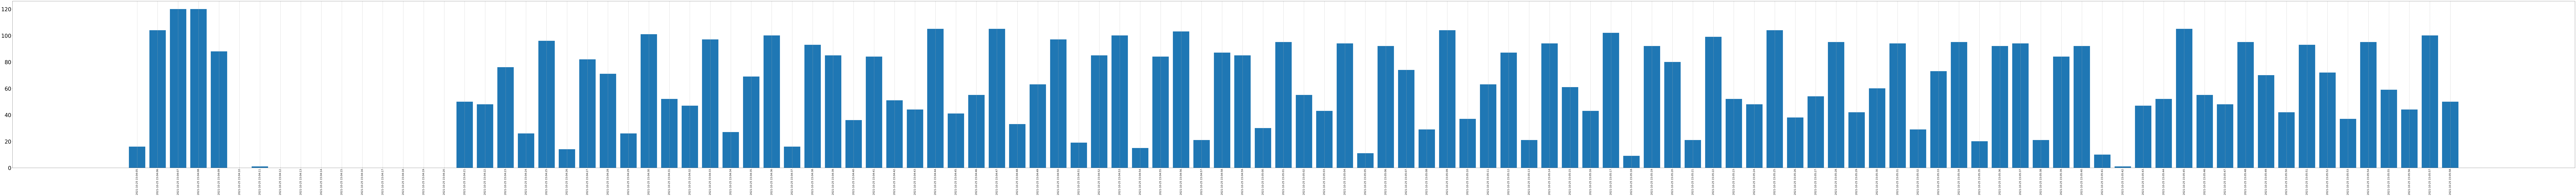

In [32]:
fig_module = plt.gcf()
fig_module.set_size_inches(300, 20)

plt.grid(True, axis='x')
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=35)
plt.bar(x_module, y_module_count)
plt.savefig('module_bar1028_prod.png', dpi=100)

In [79]:
timeline_worker = []
for i in timeline_str:
    if len(i)<20:
        timeline_worker.append(str(i) + ".0")
    else :
        timeline_worker.append(str(i)[0:21])

In [80]:
print(timeline_worker)

['2021-08-31 14:30:00.0', '2021-08-31 14:30:00.1', '2021-08-31 14:30:00.2', '2021-08-31 14:30:00.3', '2021-08-31 14:30:00.4', '2021-08-31 14:30:00.5', '2021-08-31 14:30:00.6', '2021-08-31 14:30:00.7', '2021-08-31 14:30:00.8', '2021-08-31 14:30:00.9', '2021-08-31 14:30:01.0', '2021-08-31 14:30:01.1', '2021-08-31 14:30:01.2', '2021-08-31 14:30:01.3', '2021-08-31 14:30:01.4', '2021-08-31 14:30:01.5', '2021-08-31 14:30:01.6', '2021-08-31 14:30:01.7', '2021-08-31 14:30:01.8', '2021-08-31 14:30:01.9', '2021-08-31 14:30:02.0', '2021-08-31 14:30:02.1', '2021-08-31 14:30:02.2', '2021-08-31 14:30:02.3', '2021-08-31 14:30:02.4', '2021-08-31 14:30:02.5', '2021-08-31 14:30:02.6', '2021-08-31 14:30:02.7', '2021-08-31 14:30:02.8', '2021-08-31 14:30:02.9', '2021-08-31 14:30:03.0', '2021-08-31 14:30:03.1', '2021-08-31 14:30:03.2', '2021-08-31 14:30:03.3', '2021-08-31 14:30:03.4', '2021-08-31 14:30:03.5', '2021-08-31 14:30:03.6', '2021-08-31 14:30:03.7', '2021-08-31 14:30:03.8', '2021-08-31 14:30:03.9',

In [82]:
del y_worker_count[0]
y_worker_count.append(0)

In [83]:
df_worker = pd.DataFrame([ x for x in zip(x_worker,y_worker_count)])

In [84]:
df_worker.head()

,0,1
0,2021-08-31 14:30:00.0,4
1,2021-08-31 14:30:00.6,18
2,2021-08-31 14:30:00.7,21
3,2021-08-31 14:30:00.8,20
4,2021-08-31 14:30:00.9,23


In [85]:
print(len(timeline_worker))

3000


In [88]:
print(len(x_worker))

1146


In [89]:
temp2 = []
for i in timeline_worker:
    if (df_worker[0] == i).any():
        target_count = df_worker.loc[df_worker[0] == i].iloc[0][1]
        temp2.append(target_count)
    else:
        temp2.append(0)

In [90]:
print(temp2)

[4, 0, 0, 0, 0, 0, 18, 21, 20, 23, 22, 16, 0, 0, 0, 0, 0, 0, 25, 21, 22, 22, 22, 7, 1, 0, 0, 0, 0, 14, 21, 20, 21, 20, 22, 2, 0, 0, 0, 0, 0, 13, 19, 22, 24, 19, 23, 0, 0, 0, 0, 0, 0, 2, 22, 21, 21, 20, 22, 12, 0, 0, 0, 0, 0, 11, 20, 22, 23, 20, 22, 2, 0, 0, 0, 0, 0, 17, 24, 19, 19, 23, 17, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 22, 19, 22, 17, 25, 12, 0, 0, 0, 0, 0, 6, 22, 23, 20, 21, 22, 6, 0, 0, 0, 0, 0, 8, 21, 20, 21, 19, 22, 9, 0, 0, 0, 0, 0, 17, 20, 23, 16, 25, 18, 1, 0, 0, 0, 0, 1, 19, 22, 24, 22, 25, 7, 0, 0, 0, 0, 0, 3, 27, 19, 20, 22, 22, 6, 1, 0, 0, 0, 0, 4, 24, 21, 27, 24, 20, 0, 0, 0, 0, 0, 0, 14, 18, 22, 22, 19, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 18, 20, 20, 25, 21, 8, 0, 0, 0, 0, 0, 16, 23, 22, 22, 18, 18, 1, 0

In [91]:
x_worker = timeline_worker
y_worker_count = temp2
print(len(x_worker))
print(len(y_worker_count))

3000
3000


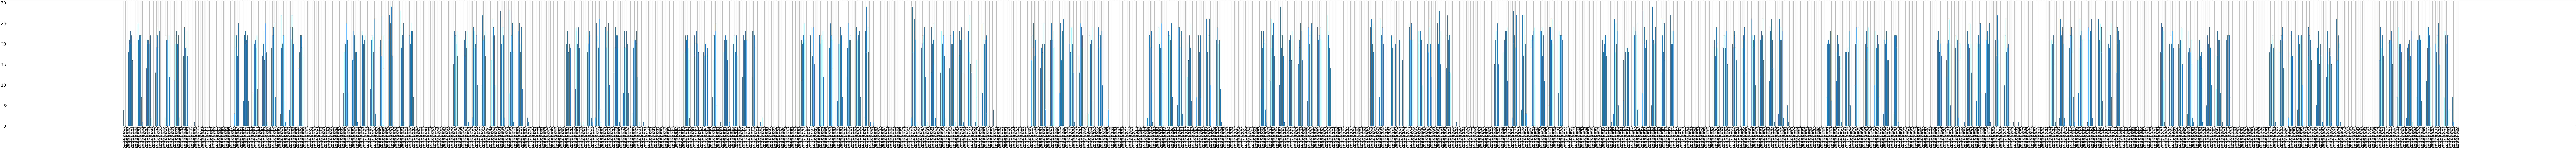

In [92]:
fig_worker = plt.gcf()
fig_worker.set_size_inches(400, 20)

plt.grid(True, axis='x')
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=35)
plt.bar(x_worker, y_worker_count)
plt.savefig('worker_bar.png', dpi=100)

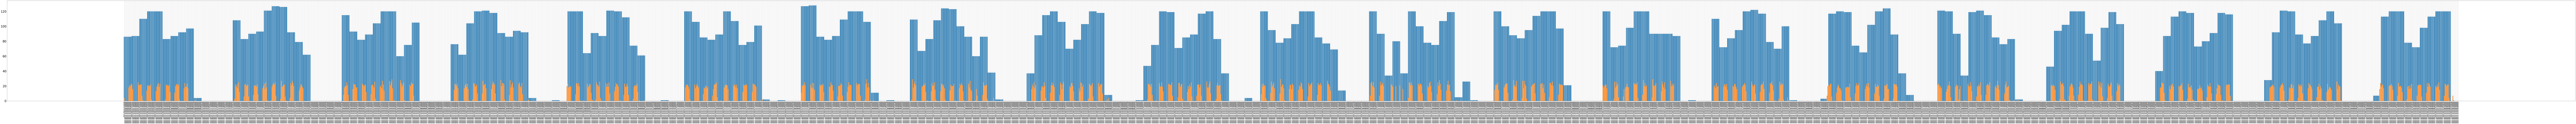

In [94]:
fig_all = plt.gcf()
fig_all.set_size_inches(500, 20)

plt.grid(True, axis='x')
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=33)
plt.bar(timeline_str, temp)
plt.bar(timeline_str, temp2)
plt.savefig('all_bar.png', dpi=100)